# Customer segmentation using k-means clustering

Below is a demo applying automated feature engineering to a retail dataset to automatically segment customers based on historical behavior

In [3]:
import featuretools as ft
import pandas as pd

In [4]:
retail_es = ft.demo.load_retail()

## Use Deep Feature Synthesis

The input to DFS is a set of entities and a list of relationships (defined by our EntitySet) and the "target_entity" to calculate features for. We can supply "cutoff times" to specify the that we want to calculate features one year after a customers first invoices.

The ouput of DFS is a feature matrix and the corresponding list of feature defintions

In [5]:
from featuretools.primitives import AvgTimeBetween, Mean, Sum, Count, Day

feature_matrix, features = ft.dfs(entityset=retail_es, target_entity="customers",
                                  agg_primitives=[AvgTimeBetween, Mean, Sum, Count],
                                  trans_primitives=[Day], max_depth=5, verbose=True)

feature_matrix, features = ft.encode_features(feature_matrix, features)

calulate_feature_matrix: 100%|██████████| 2/2 [01:23<00:00, 41.92s/it]


In [12]:
from sklearn import decomposition
from sklearn.preprocessing import Imputer, StandardScaler
# Create our imputer to replace missing values with the mean e.g.
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
X = imp.fit_transform(feature_matrix.values)
scale = StandardScaler()
X = scale.fit_transform(X)
pca = decomposition.PCA(n_components=10)
X_pca = pca.fit_transform(X)

from sklearn import preprocessing, manifold
# Reduce dimension to 2-D
tsne = manifold.TSNE(n_components=2)
X_2_dim = tsne.fit_transform(X_pca)

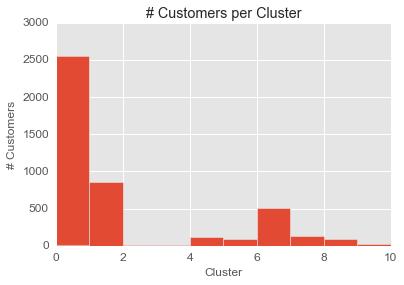

In [15]:
from sklearn import preprocessing, decomposition, cluster
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# do kmeans clustering
n_clusters=10
clust = cluster.MiniBatchKMeans(n_clusters=n_clusters,
                                reassignment_ratio=.03,
                                batch_size=1000,
                                n_init=100)
cluster_labels = clust.fit_predict(X_pca)

# plot cluster sizes
plt.hist(cluster_labels, bins=range(n_clusters+1))
plt.title('# Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('# Customers')
plt.show()

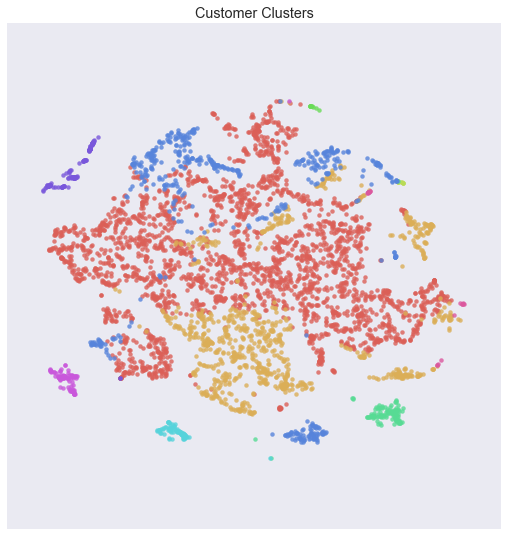

In [16]:
df = pd.DataFrame(X_2_dim, columns=["x", "y"])
df['color'] = cluster_labels

sns.set(font_scale=1.2) 
g = sns.lmplot("x", "y", data=df, hue='color',
               fit_reg=False, size=8, palette="hls", legend=False)

g.set(yticks=[], xticks=[], xlabel="", ylabel="")
plt.title("Customer Clusters")
plt.show()